# Importing libraries

In [ ]:
!pip install qiskit[visualization]==1.0.2
!pip install qiskit_aer
!pip install qiskit_ibm_runtime
!pip install matplotlib
!pip install pylatexenc
!pip install qiskit-transpiler-service

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 12.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 18.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136816 sha256=9882f33b4dd45a02fd3ef81842b717cf43f891ab206cc52c932b0177bbef9071
  Stored in directory: /root/.cache/pip/wheels/d3/31/8b/e09b0386afd80cfc556c00408c9aeea5c35c4d484a9c762fd5
Successfully built pylatexenc
  Attempting uninstall: qiskit
    Found existing installation: qiskit 1.1.1
    Uninstalling qiskit-1.1.1:
      Successfully uninstalled qiskit-1.1.1


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 323.1/323.1 kB 13.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached qiskit-1.1.1-cp38-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (4.3 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 6.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.4/130.4 kB 15.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.4/121.4 kB 13.2 MB/s eta 0:00:00
  Created wheel for ibm-platform-services: filename=ibm_platform_services-0.55.1-py3-none-any.whl size=339686 sha256=ba9e395f2de81f23669192629c9feac9ae2e8ba5edea039d2d033d3059e0d773
  Stored in directory: /root/.cache/pip/wheels/

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 524.0/524.0 kB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.5/144.5 kB 14.2 MB/s eta 0:00:00


In [ ]:
import numpy as np
from typing import List, Callable
from scipy.optimize import minimize
from scipy.optimize._optimize import OptimizeResult
import matplotlib.pyplot as plt

from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator

In [ ]:
from qiskit.quantum_info import Statevector
from qiskit.primitives import StatevectorSampler

# Steane code encoding

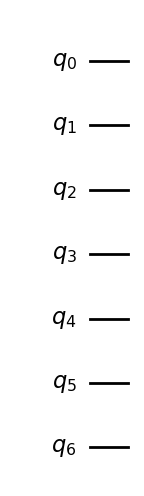

In [ ]:
qc = QuantumCircuit(7)
qc.draw('mpl')

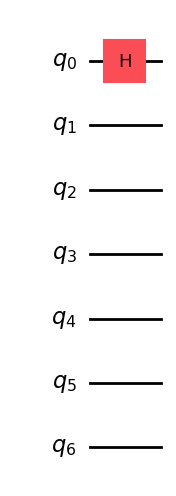

In [ ]:
qc.h(0)
qc.draw('mpl')

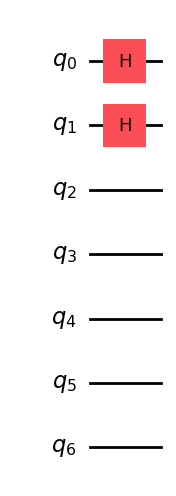

In [ ]:
qc.h(1)
qc.draw('mpl')

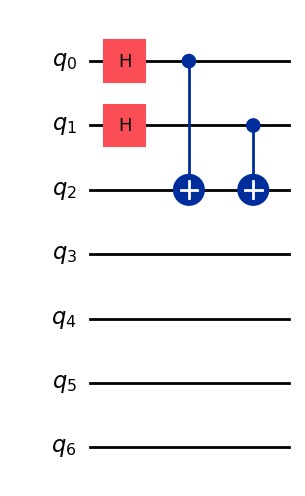

In [ ]:
qc.cx(0, 2)
qc.cx(1, 2)
qc.draw('mpl')

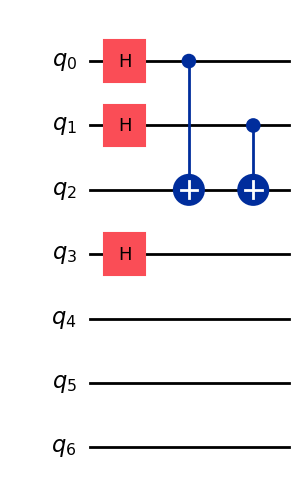

In [ ]:
qc.h(3)
qc.draw('mpl')

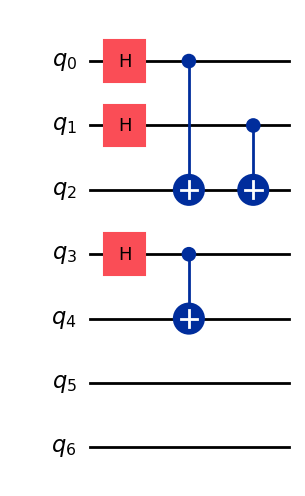

In [ ]:
qc.cx(3, 4)
qc.draw('mpl')

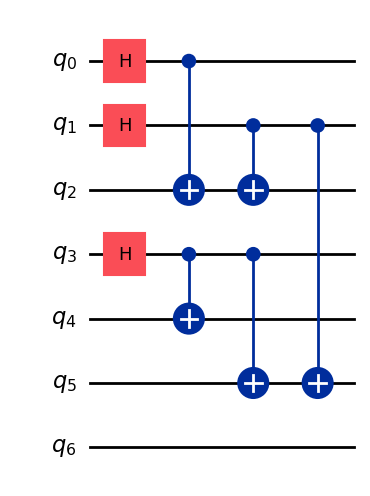

In [ ]:
qc.cx(3, 5)
qc.cx(1, 5)
qc.draw('mpl')

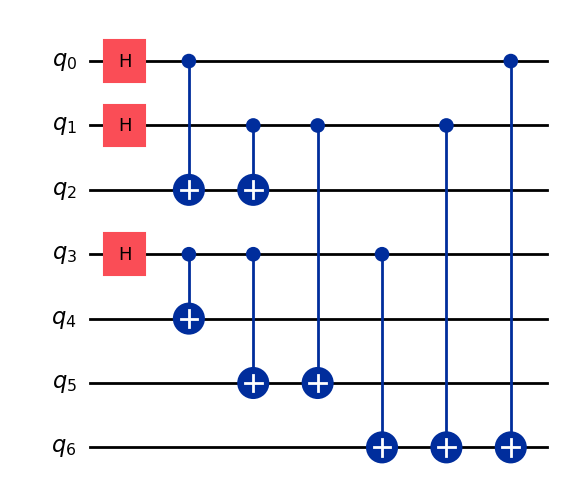

In [ ]:
qc.cx(3, 6)
qc.cx(1, 6)
qc.cx(0, 6)
qc.draw('mpl')

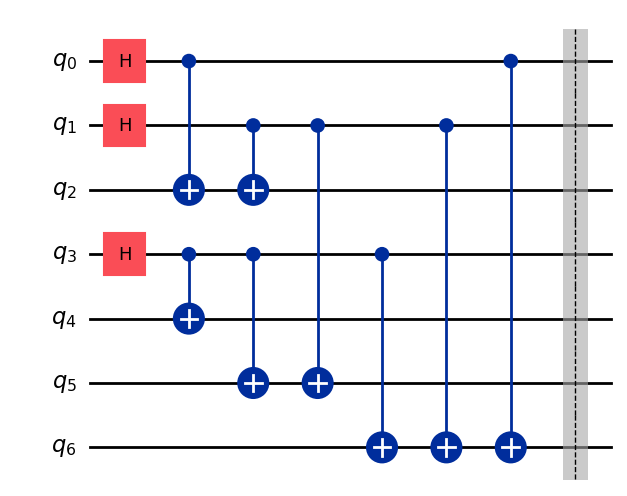

In [ ]:
qc.barrier()
qc.draw('mpl')

In [ ]:
def Steane(qc):
  qc.h(0)
  qc.h(1)
  qc.cx(0, 2)
  qc.cx(1, 2)
  qc.h(3)
  qc.cx(3, 4)
  qc.cx(3, 5)
  qc.cx(1, 5)
  qc.cx(3, 6)
  qc.cx(1, 6)
  return qc

# Stabilizer measurement to check any errors

In [ ]:
for i in range(7):
  qc.z(i)
qc.measure_all()

In [ ]:
sampler = StatevectorSampler()
pub =(qc)
job_sampler =sampler.run([pub], shots=1)

result_sampler = job_sampler.result()
counts_sampler = result_sampler[0].data.meas.get_counts()

print(counts_sampler)

{'0000000': 1}


In [ ]:
q = QuantumRegister(13)
c = ClassicalRegister(6)
qc = QuantumCircuit(q, c)
qc = Steane(qc)
for i in range(7, 13):
  qc.h(i)
qc.barrier()
qc.cx(7, 0)
qc.cx(7, 4)
qc.cx(7, 5)
qc.cx(7, 6)
qc.barrier()
qc.cx(8, 1)
qc.cx(8, 3)
qc.cx(8, 5)
qc.cx(8, 6)
qc.barrier()
qc.cx(9, 2)
qc.cx(9, 3)
qc.cx(9, 4)
qc.cx(9, 5)
qc.barrier()
qc.cz(10, 0)
qc.cz(10, 2)
qc.cz(10, 3)
qc.cz(10, 6)
qc.barrier()
qc.cz(11, 1)
qc.cz(11, 3)
qc.cz(11, 4)
qc.cz(11, 6)
qc.barrier()
qc.cz(12, 0)
qc.cz(12, 1)
qc.cz(12, 2)
qc.cz(12, 5)
qc.barrier()
for i in range(7, 13):
  qc.h(i)

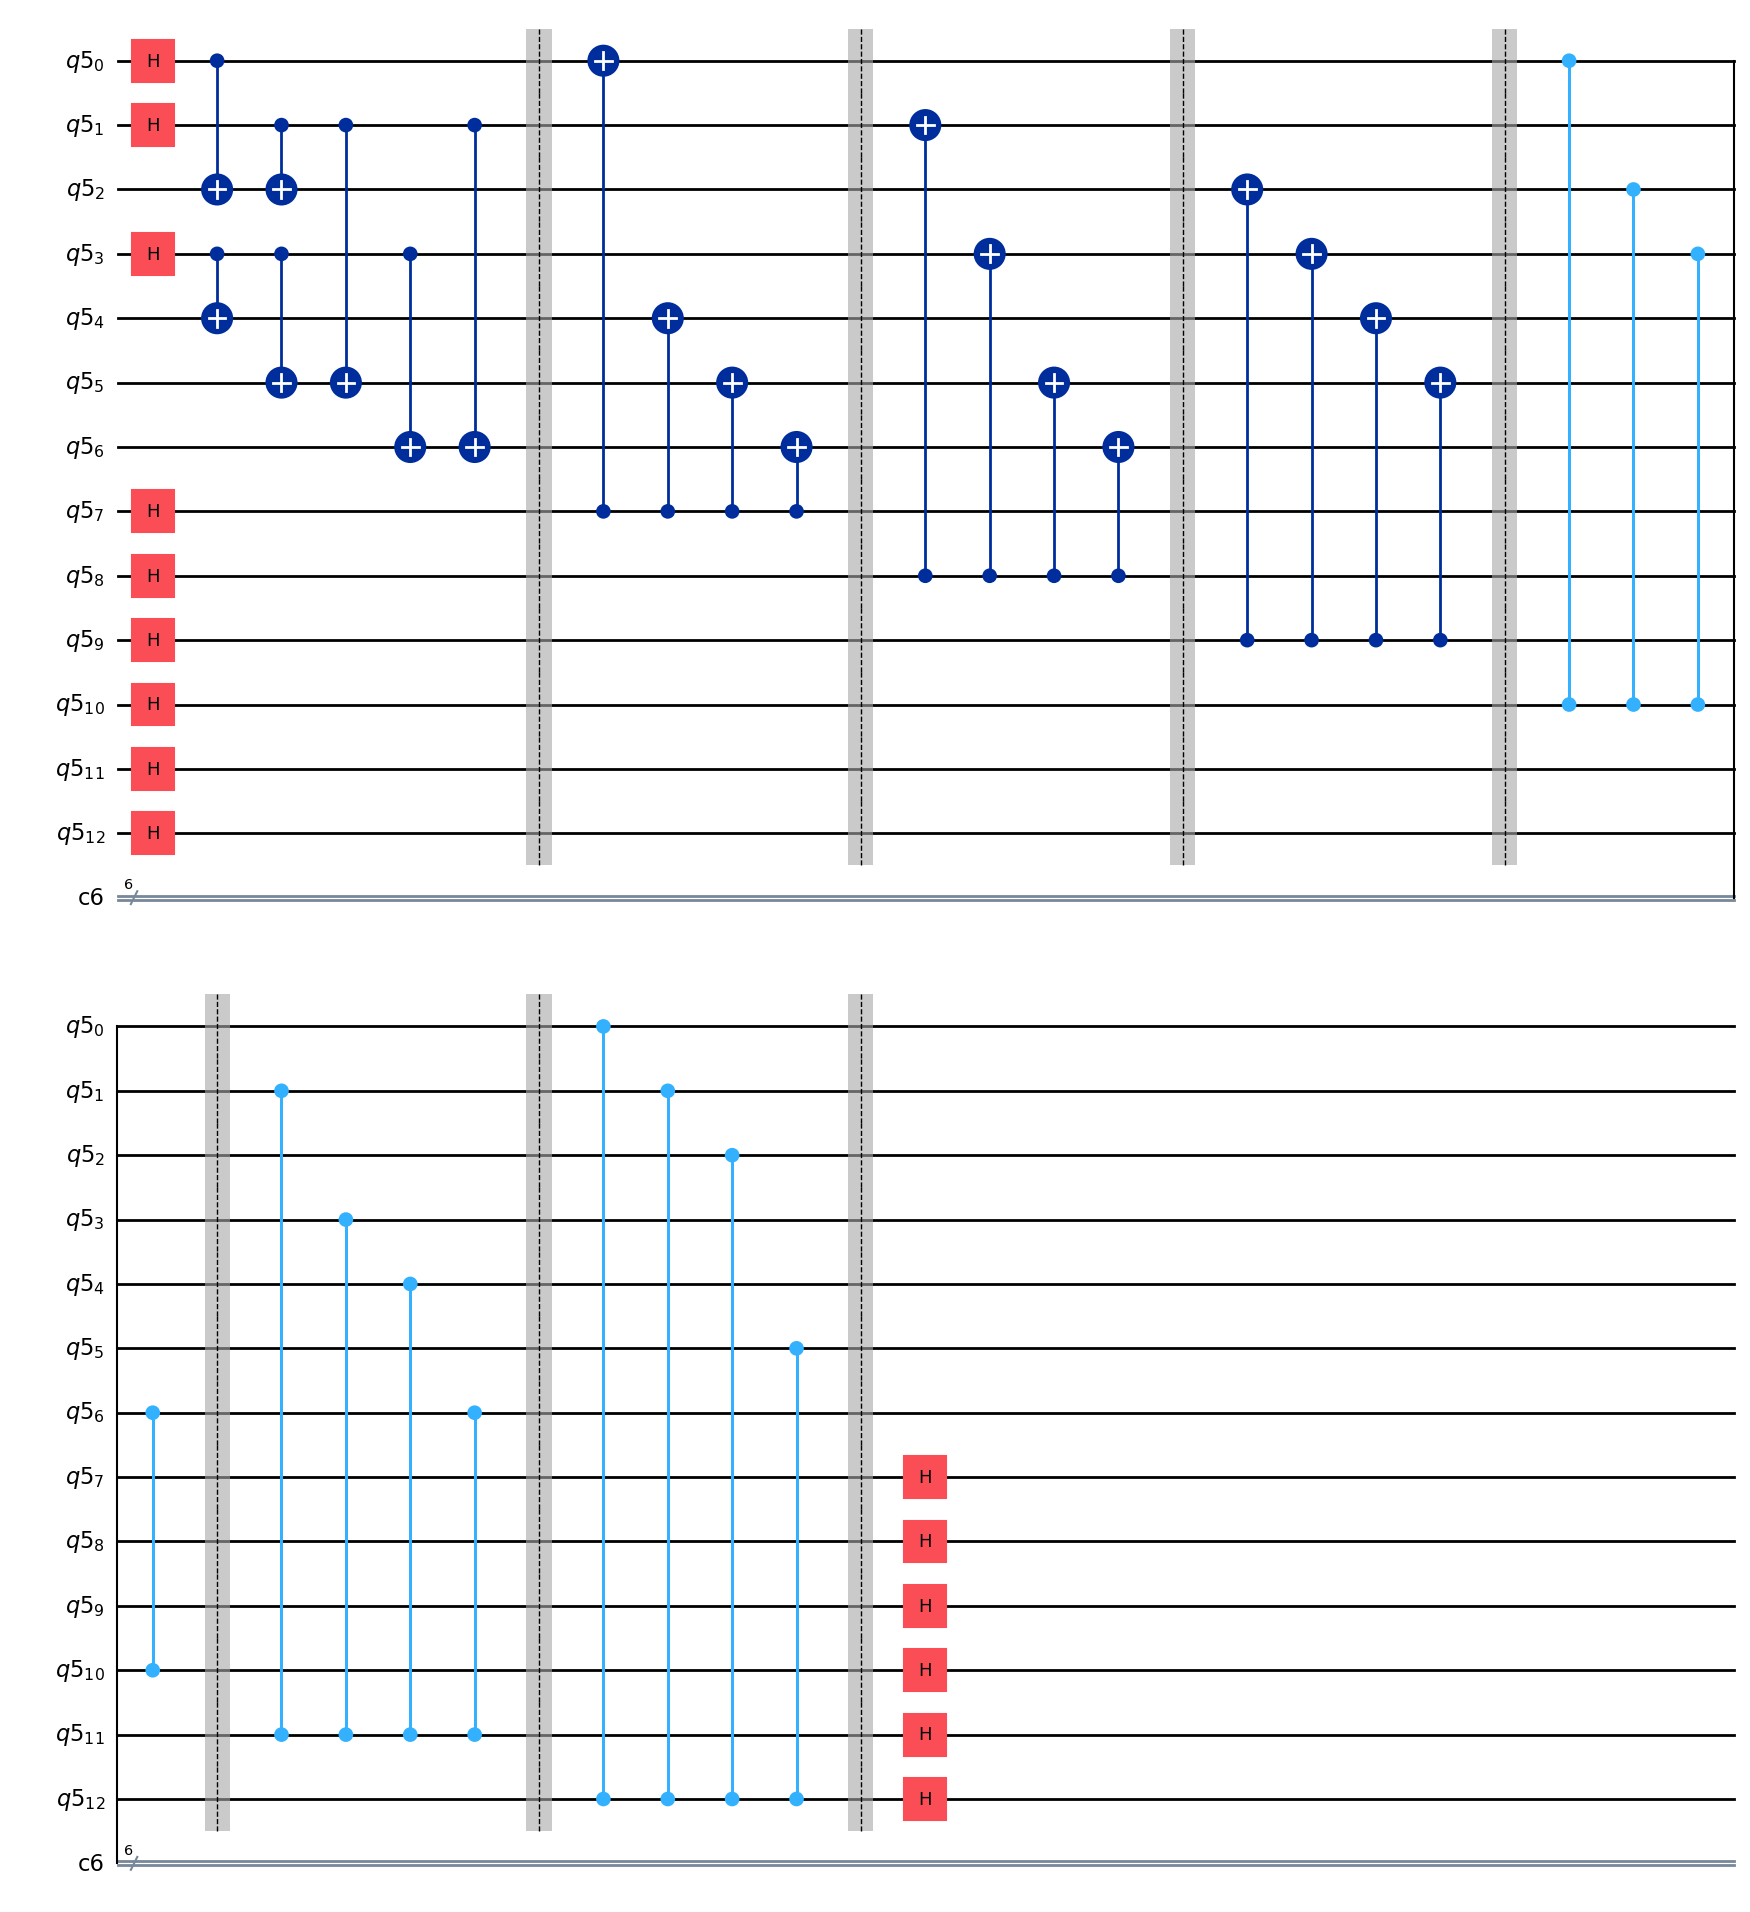

In [ ]:
qc.draw('mpl')

In [ ]:
for i in range(6):
  qc.measure(i+7, i)

# Fault tolerant Pauli Z operator

In [ ]:
qc = QuantumCircuit(7)
qc = Steane(qc)
qc.barrier()

CircuitInstruction(operation=Instruction(name='barrier', num_qubits=7, num_clbits=0, params=[]), qubits=(Qubit(QuantumRegister(7, 'q'), 0), Qubit(QuantumRegister(7, 'q'), 1), Qubit(QuantumRegister(7, 'q'), 2), Qubit(QuantumRegister(7, 'q'), 3), Qubit(QuantumRegister(7, 'q'), 4), Qubit(QuantumRegister(7, 'q'), 5), Qubit(QuantumRegister(7, 'q'), 6)), clbits=())

In [ ]:
for i in range(7):
  qc.z(i)

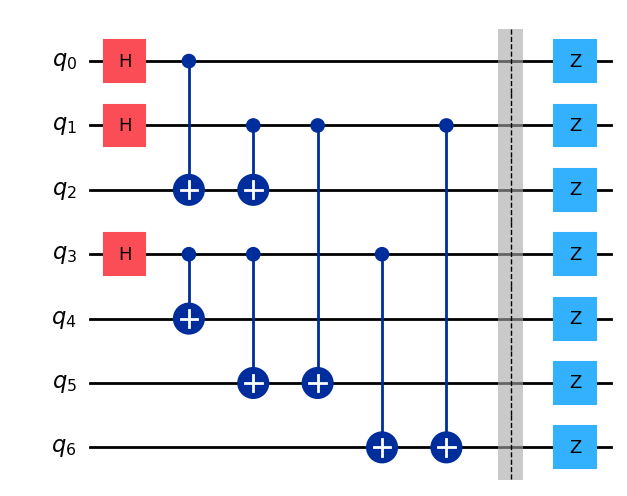

In [ ]:
qc.draw('mpl')

# Fault tolerant Pauli X operator

In [ ]:
qc = QuantumCircuit(7)
qc = Steane(qc)
qc.barrier()

CircuitInstruction(operation=Instruction(name='barrier', num_qubits=7, num_clbits=0, params=[]), qubits=(Qubit(QuantumRegister(7, 'q'), 0), Qubit(QuantumRegister(7, 'q'), 1), Qubit(QuantumRegister(7, 'q'), 2), Qubit(QuantumRegister(7, 'q'), 3), Qubit(QuantumRegister(7, 'q'), 4), Qubit(QuantumRegister(7, 'q'), 5), Qubit(QuantumRegister(7, 'q'), 6)), clbits=())

In [ ]:
for i in range(7):
  qc.x(i)

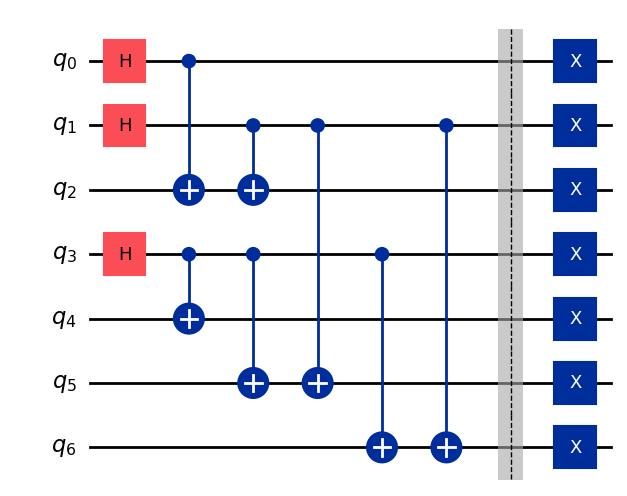

In [ ]:
qc.draw('mpl')

# Fault tolerant Pauli Y operator

In [ ]:
qc = QuantumCircuit(7)
qc = Steane(qc)
qc.barrier()

CircuitInstruction(operation=Instruction(name='barrier', num_qubits=7, num_clbits=0, params=[]), qubits=(Qubit(QuantumRegister(7, 'q'), 0), Qubit(QuantumRegister(7, 'q'), 1), Qubit(QuantumRegister(7, 'q'), 2), Qubit(QuantumRegister(7, 'q'), 3), Qubit(QuantumRegister(7, 'q'), 4), Qubit(QuantumRegister(7, 'q'), 5), Qubit(QuantumRegister(7, 'q'), 6)), clbits=())

In [ ]:
for i in range(7):
  qc.y(i)

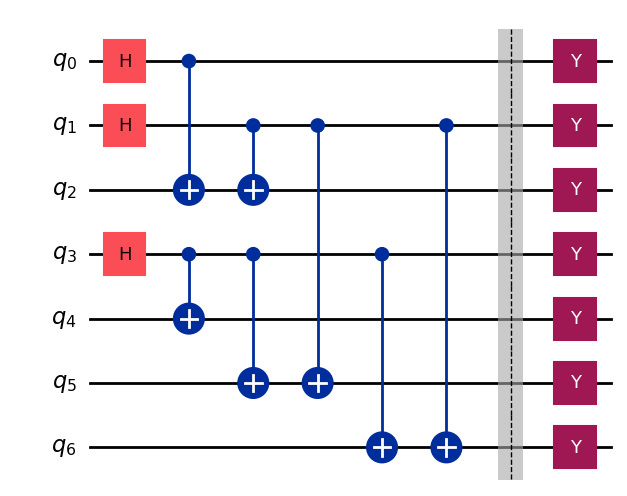

In [ ]:
qc.draw('mpl')

# Fault tolerant Hadamard operator

In [ ]:
qc = QuantumCircuit(7)
qc = Steane(qc)
qc.barrier()

CircuitInstruction(operation=Instruction(name='barrier', num_qubits=7, num_clbits=0, params=[]), qubits=(Qubit(QuantumRegister(7, 'q'), 0), Qubit(QuantumRegister(7, 'q'), 1), Qubit(QuantumRegister(7, 'q'), 2), Qubit(QuantumRegister(7, 'q'), 3), Qubit(QuantumRegister(7, 'q'), 4), Qubit(QuantumRegister(7, 'q'), 5), Qubit(QuantumRegister(7, 'q'), 6)), clbits=())

In [ ]:
for i in range(7):
  qc.h(i)

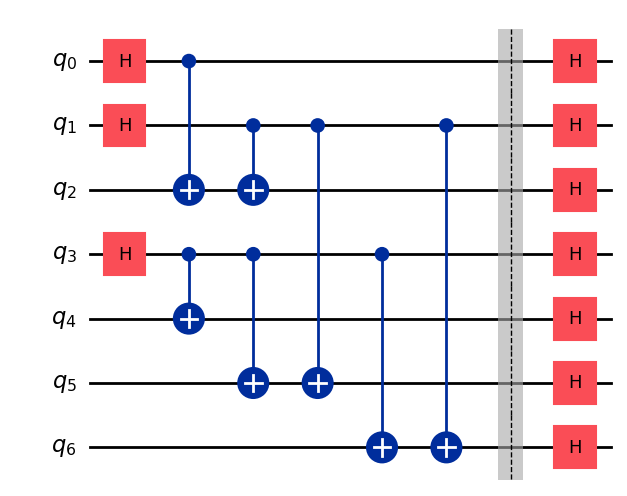

In [ ]:
qc.draw('mpl')

# Fault tolerant Phase(S) operator

In [ ]:
qc = QuantumCircuit(7)
qc = Steane(qc)
qc.barrier()

CircuitInstruction(operation=Instruction(name='barrier', num_qubits=7, num_clbits=0, params=[]), qubits=(Qubit(QuantumRegister(7, 'q'), 0), Qubit(QuantumRegister(7, 'q'), 1), Qubit(QuantumRegister(7, 'q'), 2), Qubit(QuantumRegister(7, 'q'), 3), Qubit(QuantumRegister(7, 'q'), 4), Qubit(QuantumRegister(7, 'q'), 5), Qubit(QuantumRegister(7, 'q'), 6)), clbits=())

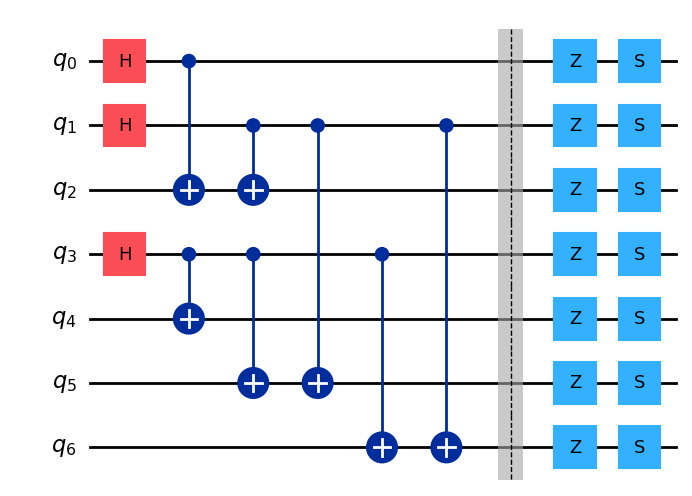

In [ ]:
for i in range(7):
  qc.z(i)

for i in range(7):
  qc.s(i)

qc.draw('mpl')

# Fault tolerant CNOT operator

In [ ]:
qc = QuantumCircuit(14)
qc = Steane(qc)
qc.barrier()
qc.h(7)
qc.h(8)
qc.cx(7, 9)
qc.cx(8, 9)
qc.h(10)
qc.cx(10, 11)
qc.cx(10, 12)
qc.cx(8, 12)
qc.cx(10, 13)
qc.cx(8, 13)
qc.barrier()
for i in range(7):
  qc.cx(i, i+7)

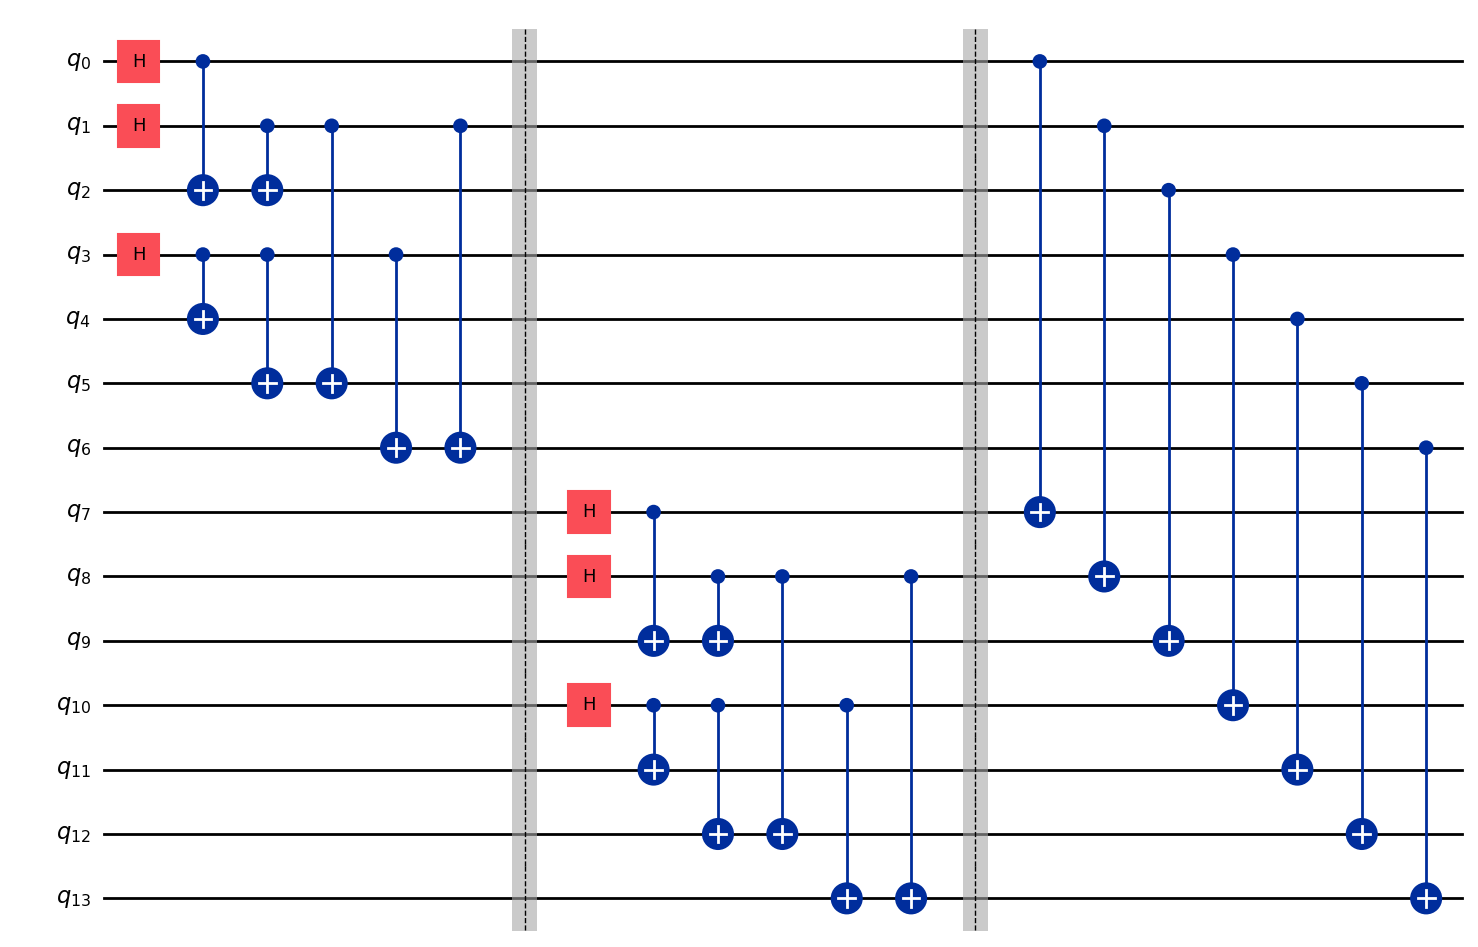

In [ ]:
qc.draw('mpl')